#**Proyecto II**
###Exploracion y preprocesamiento de datos
**Daniel Camilo Bernal Ternera**

**Intencion:**

El siguiente proyecto tiene la intención de evaluar y preprocesar un conjunto de datos relacionados con salarios en la industria tecnológica en Europa durante 2020. Mediante el planteamiento de pasos estructurados, se busca transformar y preparar la información para que sea apta para su análisis y modelado, resolviendo los retos que presentan tanto las variables numéricas como categóricas.

**Enfoque:**

El enfoque principal radica en aplicar técnicas modernas de preprocesamiento, tales como imputación de valores faltantes, escalado de datos, y transformación de variables categóricas, con el objetivo de optimizar la calidad de los datos y minimizar el sesgo. Además, se implementarán métodos para tratar la distribución de las variables numéricas, con la intención de acercarlas a una distribución gaussiana, lo que favorece el rendimiento de los modelos que se puedan utilizar posteriormente.

**Metodologia:**

Este proyecto se desarrollara mediente el uso de pipelines personalizados para el procesamiento simultáneo de datos numéricos y categóricos, integrándolos mediante herramientas avanzadas como ColumnTransformer. Finalmente, se almacenará el pipeline en un formato reutilizable para permitir pruebas con datos nuevos, asegurando la escalabilidad y replicabilidad del proceso. Este proyecto no solo representa un ejercicio técnico de preprocesamiento, sino también una oportunidad para evaluar la importancia de decisiones metodológicas en el análisis de datos.

In [29]:
#Se importan las librerias y se hacen declaraciones importantes
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Df = pd.read_csv('/content/IT Salary Survey EU 2020.csv')

#Se toma la descicion de dropear las columnas 11, 12, 13, 21 y 22 porque son casos particulares
#ademas de que faltan datos, por lo tanto sep uede llegar a cesgar la infomarcion

Df.drop(columns=['Yearly bonus + stocks in EUR','Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country','Annual bonus+stocks one year ago. Only answer if staying in same country','Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'], inplace = True)

Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Timestamp                                                1253 non-null   object 
 1   Age                                                      1226 non-null   float64
 2   Gender                                                   1243 non-null   object 
 3   City                                                     1253 non-null   object 
 4   Position                                                 1247 non-null   object 
 5   Total years of experience                                1237 non-null   object 
 6   Years of experience in Germany                           1221 non-null   object 
 7   Seniority level                                          1241 non-null   object 
 8   Your main technology / progr

### **PASO 1:**
Crear transformación de imputación para cada uno de los tipos de variables. Justificar el mètodo de imputaciòn

In [30]:
Df_PNT1 = Df

Df_PNT1['Other technologies/programming languages you use often'].fillna('No', inplace=True)

# - No se imputan las columnas 0,3,10 y 15 pues no faltan datos
# - No se deciden eliminar las filas de los datos ya que aparte de que hay columnas que tienen los datos completos
#en las que no lo estan no faltan muchos, en la columna donde faltan mas datos es en "Other technologies..." en
#la cual faltan 157 lo que representa un 12,6% de la muestra, ademas en esta columna no se imputran datos porque
#se puede decir que no sabe mas lenguajes de programacion

# - Imputacion para tipo object (Estrategia = mas frecuente)

impObj_PNT1 = SimpleImputer(strategy='most_frequent')

pipelineCat_PNT1 =\
  Pipeline(
      [
          ('pipelineCat_PNT1_OP1', impObj_PNT1),
      ]
  )

# - Imputacion para tipo float64 (Estrategia = media)
# - Faltan 27 datos en la unica variable numerica que se imputara, estos datos representan el 2,2% de los datos
#por este motivo se utiliza la media ya que un cambio tan poco significativo no representa ninguna modificacion
#en el estudio que se realiza
# - Para sustentar este cambio se hacen las respectivas distribuciones de las 3 columnas con mas cambios, antes
#y despues de la imputacion para demostrar que no hay cambios significativos
impNum_PNT1 = SimpleImputer(strategy='median')

pipelineNum_PNT1 =\
  Pipeline(
      [
          ('pipelineNum_PNT1_OP1', impNum_PNT1),
      ]
  )

#Transformacion
transformer_PNT1 = ColumnTransformer(
    [
        ('PipelineNum_PNT1',pipelineNum_PNT1,[1,10]),
        ('PipelineCat_PNT1',pipelineCat_PNT1,[0,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17])
    ]
)
transformer_PNT1.fit(Df_PNT1)
A_PNT1_TRANS = transformer_PNT1.transform(Df_PNT1)


#Se guarda e imprime la trnasformacion
Df_PNT1_TRANS = pd.DataFrame(A_PNT1_TRANS)
Df_PNT1_TRANS

<ipython-input-30-b25e3c5128eb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df_PNT1['Other technologies/programming languages you use often'].fillna('No', inplace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,26.0,80000.0,24/11/2020 11:14:15,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,80000.0,24/11/2020 11:14:16,Male,Berlin,Backend Developer,7,4,Senior,Ruby,No,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,120000.0,24/11/2020 11:14:21,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,54000.0,24/11/2020 11:15:24,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,No,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,62000.0,24/11/2020 11:15:46,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,70000.0,18/01/2021 15:05:50,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,33.0,60000.0,18/01/2021 17:46:02,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,No,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,39.0,110000.0,18/01/2021 23:20:35,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,26.0,38350.0,19/01/2021 10:17:58,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",27,Full-time employee,Unlimited contract,German,101-1000,Product,No


In [31]:
#No se evalua "Other technologies..." despues de la imputacion (mas filas cambiadas = 157) porque se reemplazan con "No"

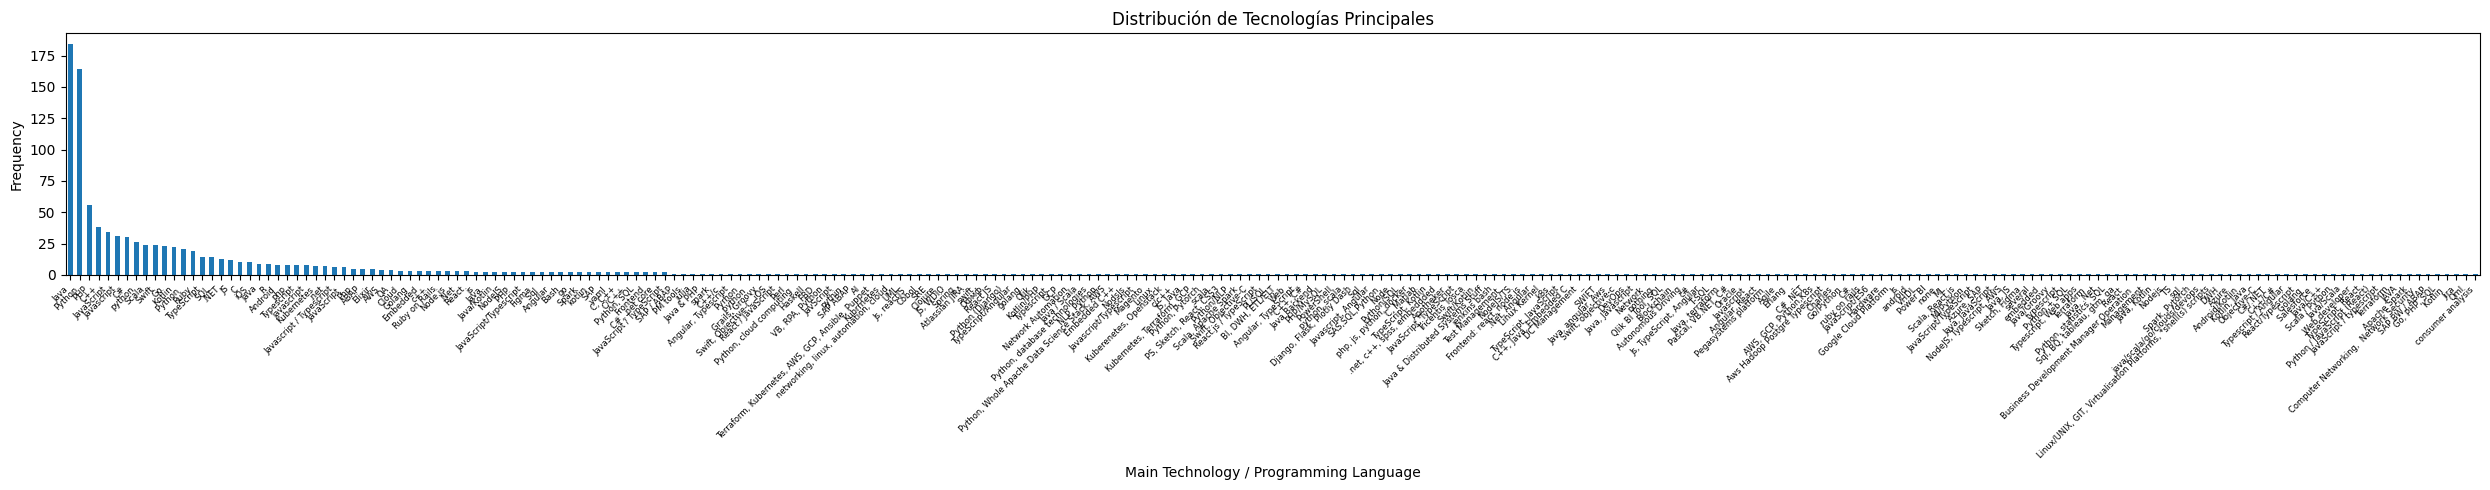

In [32]:
#Distribucion de "Your main technology..." antes de la imputacion (mas filas cambiadas = 127)
Df_PNT1_HIST2_1 = Df['Your main technology / programming language']
plt.figure(figsize=(25, 5))
Df_PNT1_HIST2_1.value_counts().plot(kind='bar')

plt.xticks(rotation=45, ha='right', fontsize=6)
plt.xlabel('Main Technology / Programming Language')
plt.ylabel('Frequency')
plt.title('Distribución de Tecnologías Principales')

plt.tight_layout()

plt.show()

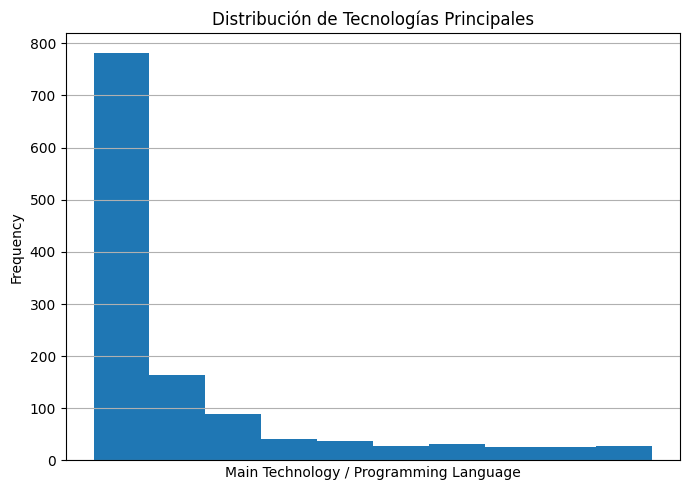

In [33]:
#Distribucion de "Your main technology..." despues de la imputacion
#Como solo queremos observar la distribucion podemos obviar las etiquetas del eje x
Df_PNT1_HIST2_2 = Df_PNT1_TRANS[9]
plt.figure(figsize=(7, 5))
Df_PNT1_HIST2_2.hist()
plt.xticks([])
plt.xlabel('Main Technology / Programming Language')
plt.ylabel('Frequency')
plt.title('Distribución de Tecnologías Principales')
plt.tight_layout()
plt.show()

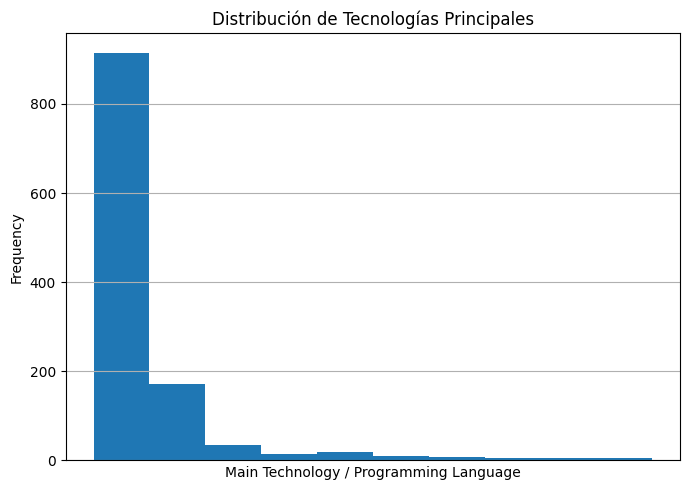

In [34]:
#Distribucion de "Number of vacation days" antes de la imputacion (mas filas cambiadas = 95)
Df_PNT1_HIST3_1 = Df['Number of vacation days']
plt.figure(figsize=(7, 5))
Df_PNT1_HIST3_1.hist()
plt.xticks([])
plt.xlabel('Main Technology / Programming Language')
plt.ylabel('Frequency')
plt.title('Distribución de Tecnologías Principales')
plt.tight_layout()
plt.show()

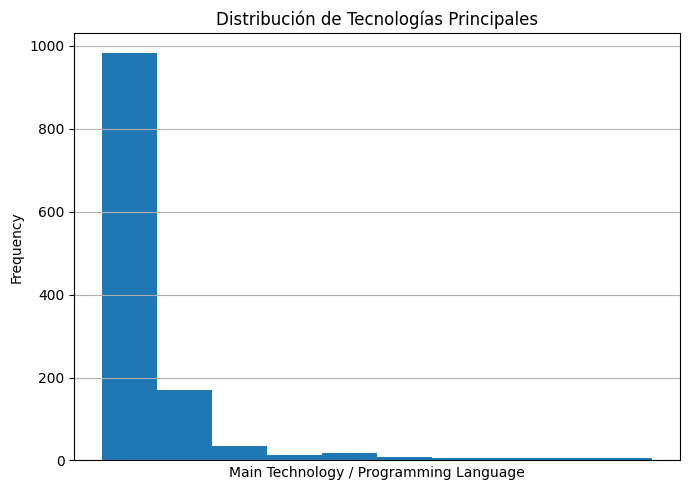

In [35]:
#Distribucion de "Number of vacation days" despues de la imputacion
Df_PNT1_HIST3_2 = Df_PNT1_TRANS[11]
plt.figure(figsize=(7, 5))
Df_PNT1_HIST3_2.hist()
plt.xticks([])
plt.xlabel('Main Technology / Programming Language')
plt.ylabel('Frequency')
plt.title('Distribución de Tecnologías Principales')
plt.tight_layout()
plt.show()

### **PASO 2:**
Probar los respectivos escalados en los datos numéricos(maxMin,Standard). Justificar en este caso cuál es mejor escalado.

In [36]:
dfNum = Df[['Age', 'Total years of experience', 'Years of experience in Germany', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Number of vacation days']]
dfNum

,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
0,26.0,5,3,80000.0,30
1,26.0,7,4,80000.0,28
2,29.0,12,6,120000.0,30
3,28.0,4,1,54000.0,24
4,37.0,17,6,62000.0,29
...,...,...,...,...,...
1248,31.0,9,5,70000.0,26
1249,33.0,10,1.5,60000.0,unlimited
1250,39.0,15,2,110000.0,28
1251,26.0,7,7,38350.0,27


In [37]:
dfNum['Total years of experience'] = pd.to_numeric(dfNum['Total years of experience'],errors = 'coerce')
dfNum['Years of experience in Germany'] = pd.to_numeric(dfNum['Years of experience in Germany'],errors = 'coerce')
dfNum['Number of vacation days'] = pd.to_numeric(dfNum['Number of vacation days'],errors = 'coerce')

<ipython-input-37-70b321b6df0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNum['Total years of experience'] = pd.to_numeric(dfNum['Total years of experience'],errors = 'coerce')
<ipython-input-37-70b321b6df0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNum['Years of experience in Germany'] = pd.to_numeric(dfNum['Years of experience in Germany'],errors = 'coerce')
<ipython-input-37-70b321b6df0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [38]:
imputer = SimpleImputer(strategy='median')
imputer.fit(dfNum)
#fit calcula la   estadistica para imputar (no hace la imputacion solo los calculos)
imputer.statistics_
#Trae la media de cada columna del df
arraytrans = imputer.transform(dfNum)
dfTrans=pd.DataFrame(arraytrans, columns=['Yearly brutto salary (without bonus and stocks) in EUR', 'Years of experience in Germany', 'Total years of experience', 'Number of vacation days', 'Age'])
dfTrans

,Yearly brutto salary (without bonus and stocks) in EUR,Years of experience in Germany,Total years of experience,Number of vacation days,Age
0,26.0,5.0,3.0,80000.0,30.0
1,26.0,7.0,4.0,80000.0,28.0
2,29.0,12.0,6.0,120000.0,30.0
3,28.0,4.0,1.0,54000.0,24.0
4,37.0,17.0,6.0,62000.0,29.0
...,...,...,...,...,...
1248,31.0,9.0,5.0,70000.0,26.0
1249,33.0,10.0,1.5,60000.0,28.0
1250,39.0,15.0,2.0,110000.0,28.0
1251,26.0,7.0,7.0,38350.0,27.0


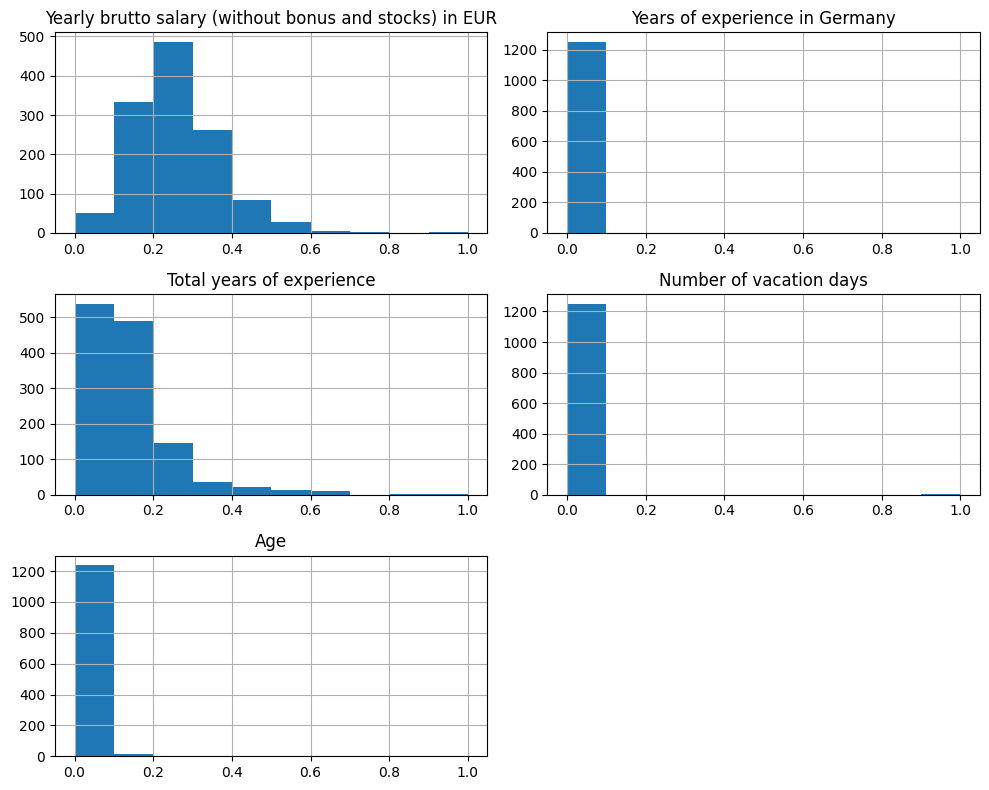

In [39]:
objeto = MinMaxScaler()
objeto.fit(dfTrans)
dfiii = objeto.transform(dfTrans)
dfiv = pd.DataFrame(dfiii)
dfv = dfiv.rename(columns={dfiv.columns[0]: 'Yearly brutto salary (without bonus and stocks) in EUR', dfiv.columns[1]: 'Years of experience in Germany', dfiv.columns[2]: 'Total years of experience', dfiv.columns[3]: 'Number of vacation days', dfiv.columns[4]: 'Age'})

dfv.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

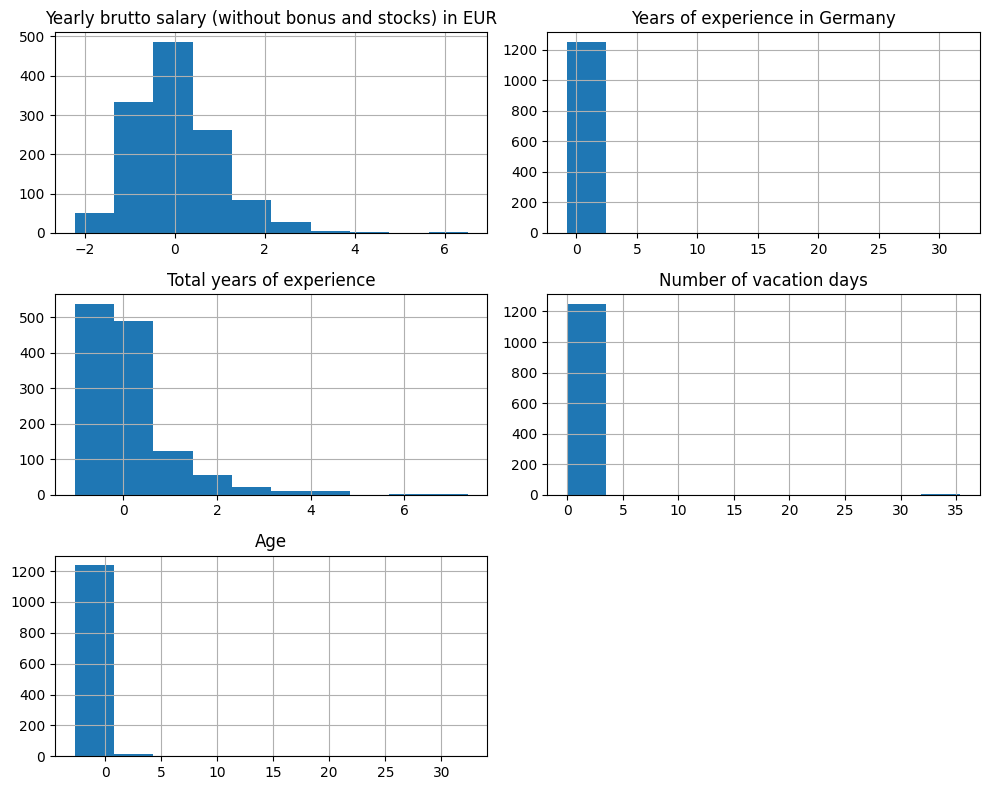

In [40]:
y = StandardScaler()
y.fit(dfTrans)
dfii = y.transform(dfTrans)
Dfiv = pd.DataFrame(dfii)
Dfv = Dfiv.rename(columns={Dfiv.columns[0]: 'Yearly brutto salary (without bonus and stocks) in EUR', Dfiv.columns[1]: 'Years of experience in Germany', Dfiv.columns[2]: 'Total years of experience', Dfiv.columns[3]: 'Number of vacation days', Dfiv.columns[4]: 'Age'})

Dfv.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Para este punto pudimos concluir que el mejor método entre MinMax y Standard es mejor Standard, ya que este es menos susceptible a los outlayers que se encuentra en el dataset que se esté estudiando

### **PASO 3:**
Determinar la mejor transformación categórica(onehot vs ordinal) para cada columna. Justificar.

In [41]:
Df_PNT3 = Df_PNT1_TRANS

#-Se utiliza onehot en todas
TRANS_PNT3 = OneHotEncoder()
#-La siguiente linea explica el motivo por el cual no se emplea ordinal en senior
Df_PNT1_TRANS[8].unique()
#-TRANS_PNT3_2 = OrdinalEncoder(categories=[["no idea, there are no ranges in the firm ","No level","No level "]])
#-La linea de arriba quiere simular una transformacion ordinal, como se puede ver hay niveles que estan mal escritos
#por lo tanto no podemos definir que " no level" sea mejor o pero que "no  level "

#Se crea el pipeline categorico Onehot
pipelineCat_PNT3 =\
  Pipeline(
      [
          ('operacion1_PNT3', TRANS_PNT3)
      ]
  )

#Se realiza la trnasformacion
transformer_PNT3 = ColumnTransformer(
    [
        ('PipelineOnehot',pipelineCat_PNT3,[3,4,5,8,9,10,12,13,14,15,16,17])
    ]
)
transformer_PNT3.fit(Df_PNT3)
Df_PNT3_TRANS = transformer_PNT3.transform(Df_PNT3)
Df_PNT3_TRANS

<1253x1219 sparse matrix of type '<class 'numpy.float64'>'
	with 15036 stored elements in Compressed Sparse Row format>

### **PASO 4:**
Crear un transformer personalizado que procese  los string de las variables categóricas de la columna: lenguaje de programación. Se debe crear una columna por cada lenguaje indicando con un 1 si maneja determinado lenguaje.
https://www.andrewvillazon.com/custom-scikit-learn-transformers/


In [42]:
#Asilando la columna a trabajar
Df_PNT4 = Df_PNT1_TRANS[9]

#Creacion del transformador como funcion
from sklearn.preprocessing import FunctionTransformer

pipeline_PNT4 =\
  Pipeline(
      [
        #En este caso FunctionTransformer utiliza la funcion get_dummies como transformacion
        #La funcion get_dummies se encarga de hacer el onehot
        ("simple_one_hot_encode", FunctionTransformer(pd.get_dummies))
      ]
  )

TRANS_PNT4 = pipeline_PNT4.fit_transform(Df_PNT4)
TRANS_PNT4

,-,--,.NET,.Net,".Net, Angular",.net,".net, c++, spss, embeddded",ABAP,AI,AWS,...,ruby on rails,scala,several,spark,sql,swift,typescript,yaml,Офмф,С#
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1249,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1250,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1251,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **PASO 5:**
Hacer la distribución de las variables numéricas más Gaussianas.

Una vez aplicado PowerTransform a el dataframe que únicamente contiene los datos numéricos y al hacer el histograma de cada variable se puede observar que varias variables tienen un comportamiento similar a la campana de Gauss. Estas son "Years of experience in Germany", "Total years of experience" and "Number of vacation days". De estas tres variables se podría concluir que la que más se parece a la campana de Gauss es la variable "Age".

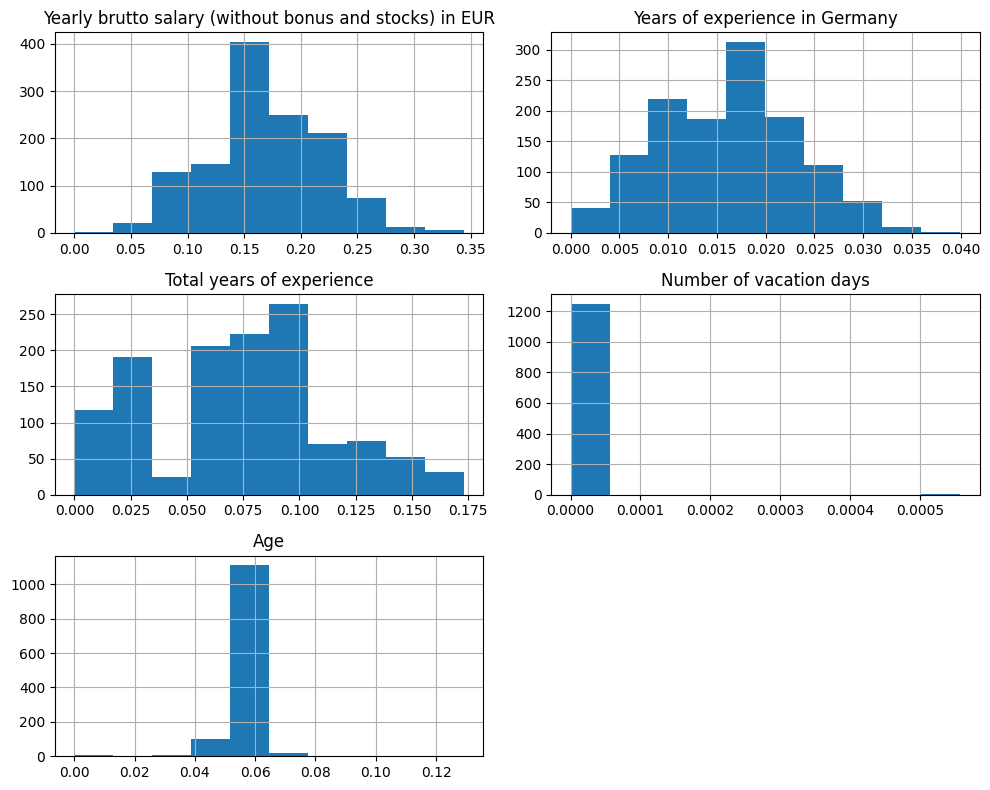

In [43]:
p5 = PowerTransformer(method = 'yeo-johnson', standardize = False)
p5.fit(dfv)
p_5 = p5.transform(dfv)
DfPunto5 = pd.DataFrame(p_5)
dfPunto5 = DfPunto5.rename(columns={dfiv.columns[0]: 'Yearly brutto salary (without bonus and stocks) in EUR', DfPunto5.columns[1]: 'Years of experience in Germany', DfPunto5.columns[2]: 'Total years of experience', DfPunto5.columns[3]: 'Number of vacation days', DfPunto5.columns[4]: 'Age'})

dfPunto5.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### **PASO 6:**
Crear un pipeline Numérico y otro Categórico. Unir ambos en un solo pipeline usando ColumnTransformer.

In [45]:
pipeline_numerico_pnt6 =\
   Pipeline(
      [
        ('Imputador_pnt6', SimpleImputer(strategy='median')),
        ('Escalador_pnt6', MinMaxScaler()),
        ('Distribución_pnt6', PowerTransformer(method='yeo-johnson', standardize = False))
      ]
   )

pipeline_categorico_pnt6 =\
   Pipeline(
      [
        ('Imputador_pnt6_2', SimpleImputer(strategy='most_frequent')),
        ('Escalador_pnt6_2', OneHotEncoder(sparse_output=False))
      ]
   )

transformer_PNT6 = ColumnTransformer(
  [
      ('Numerico_pnt6',pipeline_numerico_pnt6, [1,10]),
      ('Categorico_pnt6',pipeline_categorico_pnt6, [0,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17]),
  ]
)

transformer_PNT6.fit(Df_PNT1)
transformer_PNT6.transform(Df_PNT1)


array([[1.01285777e-01, 6.99550650e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01285777e-01, 6.99550650e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39464929e-01, 1.09890526e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.29244310e-01, 9.99093478e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01285777e-01, 2.83417938e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01285777e-01, 5.49718758e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### **PASO 7:**
Guardar el pipeline como joblib.

In [46]:
joblib.dump(transformer_PNT6, "model.joblib")

['model.joblib']

### **PUNTO 8:**
Cargar el pipeline y probarlo con un dato de entrada.

In [47]:
#Se sube model.joblib en la parte II del proyecto II para verificar su integridad